In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-financial-news/valid_data.csv
/kaggle/input/twitter-financial-news/train_data.csv


In [3]:
df = pd.read_csv('/kaggle/input/twitter-financial-news/train_data.csv')

In [4]:
df.head()

,text,label
0,Here are Thursday's biggest analyst calls: App...,0
1,Buy Las Vegas Sands as travel to Singapore bui...,0
2,"Piper Sandler downgrades DocuSign to sell, cit...",0
3,"Analysts react to Tesla's latest earnings, bre...",0
4,Netflix and its peers are set for a ‘return to...,0


In [5]:
x = """LABEL_0": "Analyst Update",

    "LABEL_1": "Fed | Central Banks",

    "LABEL_2": "Company | Product News",

    "LABEL_3": "Treasuries | Corporate Debt",

    "LABEL_4": "Dividend",

    "LABEL_5": "Earnings",

    "LABEL_6": "Energy | Oil",

    "LABEL_7": "Financials",

    "LABEL_8": "Currencies",

    "LABEL_9": "General News | Opinion",

    "LABEL_10": "Gold | Metals | Materials",

    "LABEL_11": "IPO",

    "LABEL_12": "Legal | Regulation",

    "LABEL_13": "M&A | Investments",

    "LABEL_14": "Macro",

    "LABEL_15": "Markets",

    "LABEL_16": "Politics",

    "LABEL_17": "Personnel Change",

    "LABEL_18": "Stock Commentary",

    "LABEL_19": "Stock Movement"
"""

In [6]:
e = {}
for f in [{d.split(':')[0].strip() : d.split(':')[1].strip() } for d in [q.strip().replace('"',"").replace(',','').replace('LABEL_','') for q in x.split('\n') if len(q)>2]]:
    e[list(f.keys())[0]] = list(f.values())[0]
    
print(e)

{'0': 'Analyst Update', '1': 'Fed | Central Banks', '2': 'Company | Product News', '3': 'Treasuries | Corporate Debt', '4': 'Dividend', '5': 'Earnings', '6': 'Energy | Oil', '7': 'Financials', '8': 'Currencies', '9': 'General News | Opinion', '10': 'Gold | Metals | Materials', '11': 'IPO', '12': 'Legal | Regulation', '13': 'M&A | Investments', '14': 'Macro', '15': 'Markets', '16': 'Politics', '17': 'Personnel Change', '18': 'Stock Commentary', '19': 'Stock Movement'}


In [9]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap
from sklearn.ensemble import RandomForestClassifier

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.8, random_state=7, stratify=df['label'])
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=7, stratify=y_train)

In [12]:
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [13]:


# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Create an empty dataframe to hold the TF-IDF results
tfidf_results = pd.DataFrame()

# Calculate TF-IDF for each class
for class_label in tqdm(df['label'].unique()):
    # Filter the documents belonging to the current class
    class_docs = df[df['label'] == class_label]['text']
    
    # Fit and transform the vectorizer on the current class documents
    tfidf_matrix = vectorizer.fit_transform(class_docs)
    
    # Create a dataframe with the TF-IDF values
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    tfidf_df['label'] = class_label
    
    # Append the results to the main dataframe
    tfidf_results = pd.concat([tfidf_results, tfidf_df], ignore_index=True)

print(tfidf_results)

100%|██████████| 20/20 [01:27<00:00,  4.37s/it]


        00  000  0kyuksbgis   10  104   11   12       120  129  12m  ...  \
0      0.0  0.0         0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...   
1      0.0  0.0         0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...   
2      0.0  0.0         0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...   
3      0.0  0.0         0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...   
4      0.0  0.0         0.0  0.0  0.0  0.0  0.0  0.303899  0.0  0.0  ...   
...    ...  ...         ...  ...  ...  ...  ...       ...  ...  ...  ...   
16985  NaN  NaN         NaN  0.0  NaN  NaN  0.0       NaN  NaN  NaN  ...   
16986  NaN  NaN         NaN  0.0  NaN  NaN  0.0       NaN  NaN  NaN  ...   
16987  NaN  NaN         NaN  0.0  NaN  NaN  0.0       NaN  NaN  NaN  ...   
16988  NaN  NaN         NaN  0.0  NaN  NaN  0.0       NaN  NaN  NaN  ...   
16989  NaN  NaN         NaN  0.0  NaN  NaN  0.0       NaN  NaN  NaN  ...   

       zhcoquhilh  zi0x1xiuyq  zkvdzvwqs4  zkzcjjptnv  zln6jvcdew  zmoyahc2do  \
0     

In [18]:
dividend = tfidf_results.loc[tfidf_results['label']==4,:]

In [19]:
dividend.head()

,00,000,0kyuksbgis,10,104,11,12,120,129,12m,...,zhcoquhilh,zi0x1xiuyq,zkvdzvwqs4,zkzcjjptnv,zln6jvcdew,zmoyahc2do,zoned,zs8wguhnh1,zvdwuwajod,zye4dsuuaa
5523,0.0,NaN,NaN,0.000000,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5524,0.0,NaN,NaN,0.000000,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5525,0.0,NaN,NaN,0.254523,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5526,0.0,NaN,NaN,0.000000,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5527,0.0,NaN,NaN,0.000000,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
div_non_na = dividend.dropna(axis=1)

In [34]:
useful_vectors = []
for x in div_non_na.columns:
    useful_vectors.append([x, sum(div_non_na[x])])

In [31]:
useful_vectors

[[{'00': 0.726973079685586}],
 [{'10': 1.7397165303471975}],
 [{'11': 1.1174935251179965}],
 [{'12': 0.9852820417571728}],
 [{'13': 1.8174199115094687}],
 [{'14': 1.2703195139842496}],
 [{'15': 3.2473033754070575}],
 [{'16': 1.4965829068853669}],
 [{'17': 0.8576489160766532}],
 [{'18': 1.1483833184341363}],
 [{'20': 1.801909149370263}],
 [{'2022': 5.9753712079577115}],
 [{'2023': 0.6923128175188147}],
 [{'2026': 1.0371687816748523}],
 [{'21': 1.1574724404422065}],
 [{'25': 1.6337393810729979}],
 [{'28': 1.505241691153693}],
 [{'30': 2.4005703826842297}],
 [{'35': 1.1888806712843303}],
 [{'37': 0.8973275543183283}],
 [{'45': 0.6209815434760886}],
 [{'500': 0.6447208683197719}],
 [{'52': 0.42540134387970385}],
 [{'54': 0.4464906824734382}],
 [{'59': 0.36113845472731443}],
 [{'70': 0.7534603241531617}],
 [{'advantage': 0.24237577545949862}],
 [{'aerospace': 0.8101996609540905}],
 [{'after': 0.291659360065668}],
 [{'alb': 0.49130342758554135}],
 [{'ally': 0.5194906573325905}],
 [{'america'

In [37]:
dividend_uv = pd.DataFrame(useful_vectors)

In [39]:
dividend_uv.columns = ['word','score']

In [42]:
dividend_ranked_uv = dividend_uv.sort_values(by='score',ascending=False).reset_index(drop=True)

In [50]:
####   dividend_Vector
dividend_vector = ' '.join(list(dividend_ranked_uv.loc[:50,'word']))

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [53]:
# def get_similarity_score():
# Define the two sentences
def get_similarity_score(sentence2):
    sentence1 = dividend_vector
    #     sentence2 = df.loc[0,'text']

    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Fit and transform the sentences to TF-IDF vectors
    tfidf_matrix = vectorizer.fit_transform([sentence1, sentence2])

    # Calculate cosine similarity between the TF-IDF vectors of the sentences
    cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
    return cosine_sim[0][0]

In [54]:
df['dividend_similarity'] = 0
for x in tqdm(range(0,len(df))):
    df.loc[x,'dividend_similarity'] = get_similarity_score(df.loc[x,'text'])

100%|██████████| 16990/16990 [01:01<00:00, 276.31it/s]


In [55]:
df.head()

,text,label,dividend_similarity
0,Here are Thursday's biggest analyst calls: App...,0,0.054786
1,Buy Las Vegas Sands as travel to Singapore bui...,0,0.058699
2,"Piper Sandler downgrades DocuSign to sell, cit...",0,0.058699
3,"Analysts react to Tesla's latest earnings, bre...",0,0.074611
4,Netflix and its peers are set for a ‘return to...,0,0.126356


In [59]:


# import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt 
# % matplotlib inline
 
# to ignore the warnings 
from warnings import filterwarnings

In [66]:
e[str(df.loc[100,'label'])]

'Analyst Update'

In [67]:
df['label_value'] = ""
df['label_value'] = df['label'].apply(lambda x: e[str(x)])

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


<Axes: xlabel='dividend_similarity', ylabel='Count'>

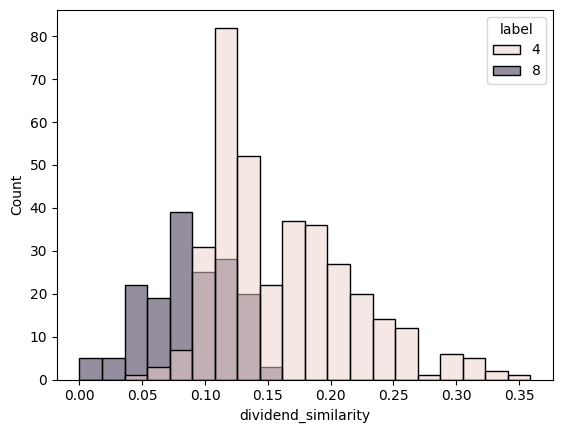

In [60]:
sns.histplot(data=df.loc[((df['label']==8 )|(df['label']==4)),: ], x="dividend_similarity", hue="label")

['Analyst Update',
 'Company | Product News',
 'General News | Opinion',
 'Currencies',
 'Earnings',
 'Energy | Oil',
 'Fed | Central Banks',
 'Financials',
 'Gold | Metals | Materials',
 'IPO',
 'Legal | Regulation',
 'M&A | Investments',
 'Macro',
 'Markets',
 'Personnel Change',
 'Politics',
 'Stock Commentary',
 'Stock Movement',
 'Treasuries | Corporate Debt']

In [72]:
df.head()

,text,label,dividend_similarity,label_value
0,Here are Thursday's biggest analyst calls: App...,0,0.054786,Analyst Update
1,Buy Las Vegas Sands as travel to Singapore bui...,0,0.058699,Analyst Update
2,"Piper Sandler downgrades DocuSign to sell, cit...",0,0.058699,Analyst Update
3,"Analysts react to Tesla's latest earnings, bre...",0,0.074611,Analyst Update
4,Netflix and its peers are set for a ‘return to...,0,0.126356,Analyst Update


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


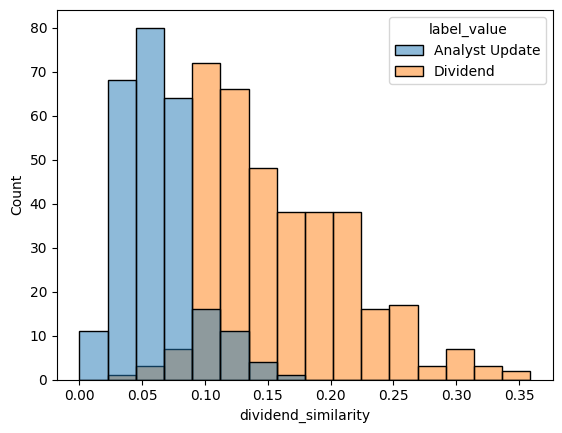

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


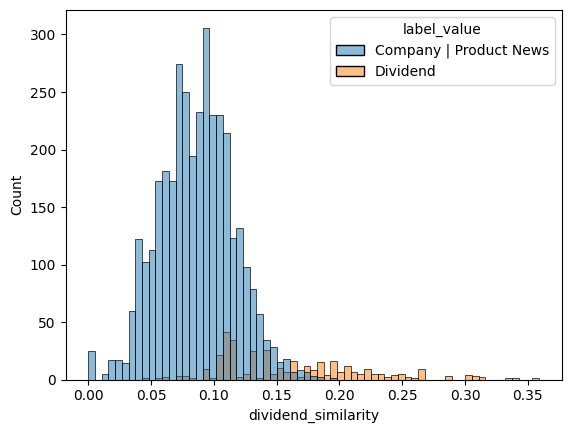

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


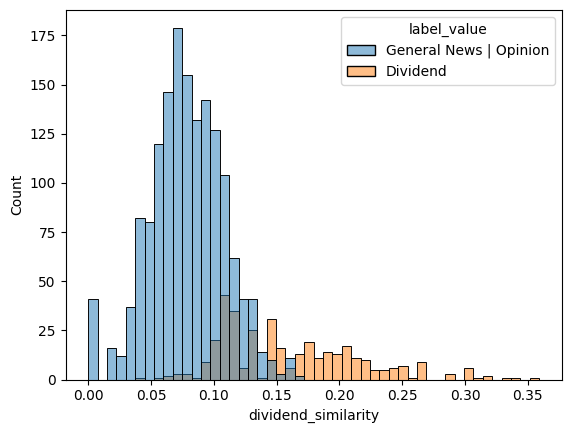

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


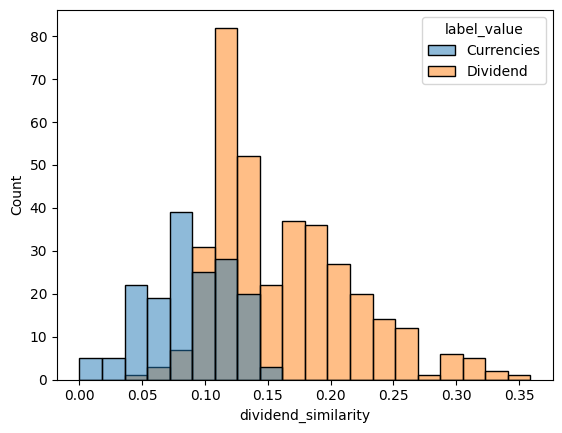

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


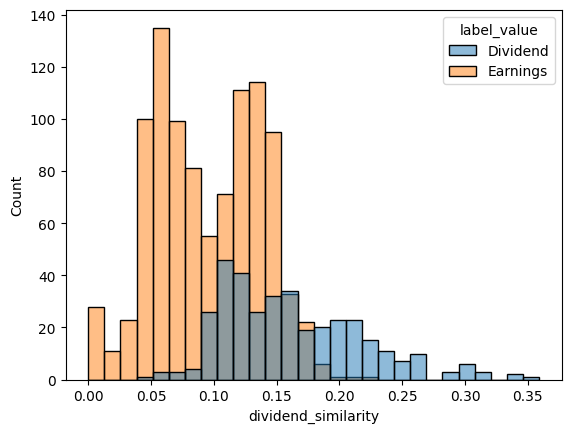

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


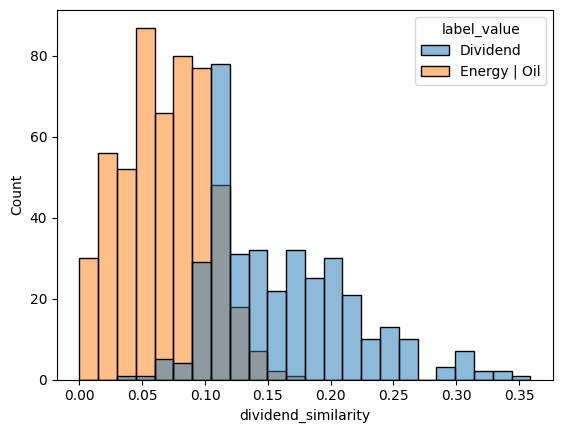

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


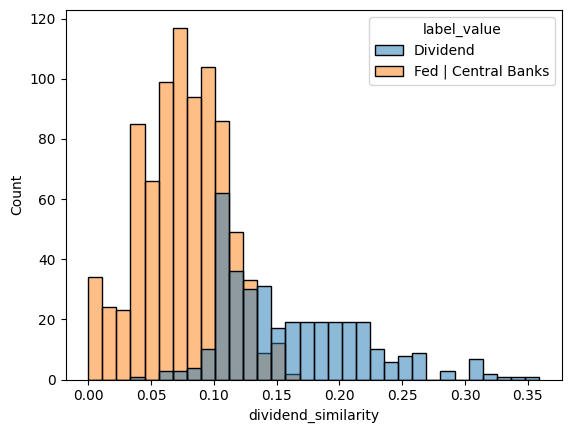

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


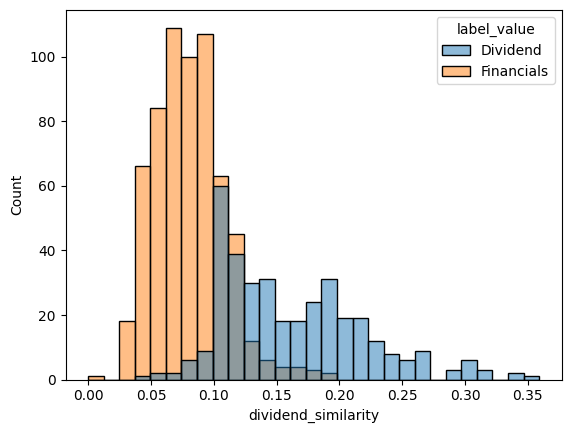

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


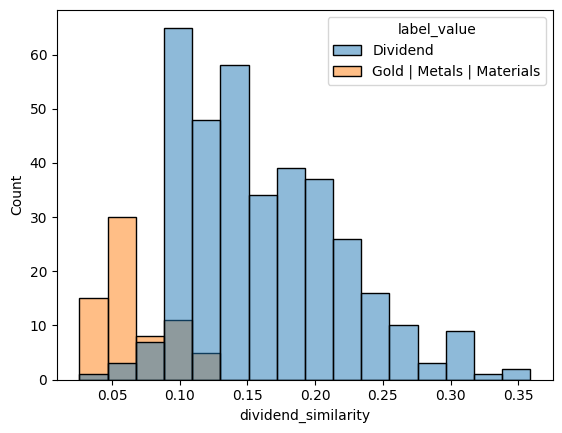

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


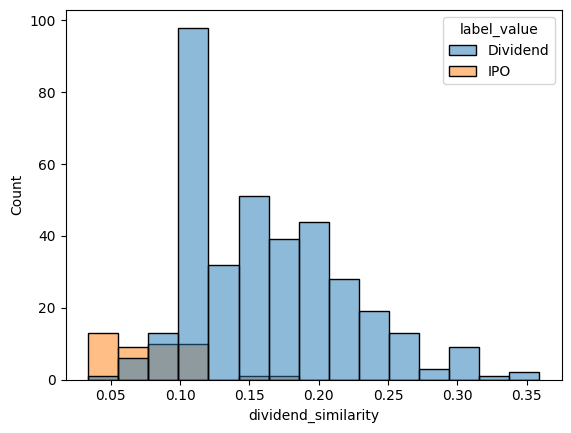

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


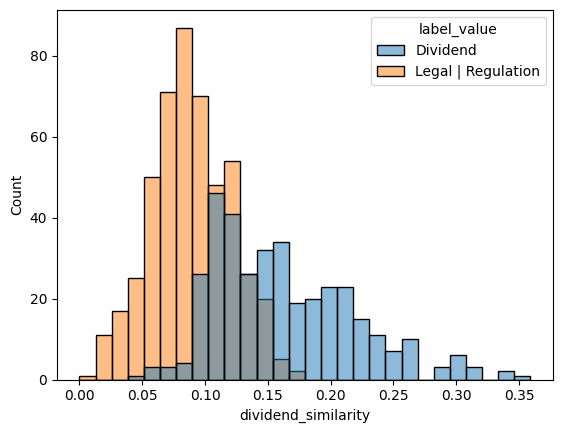

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


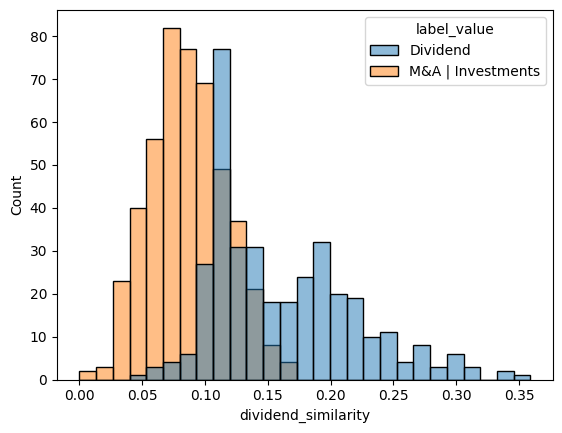

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


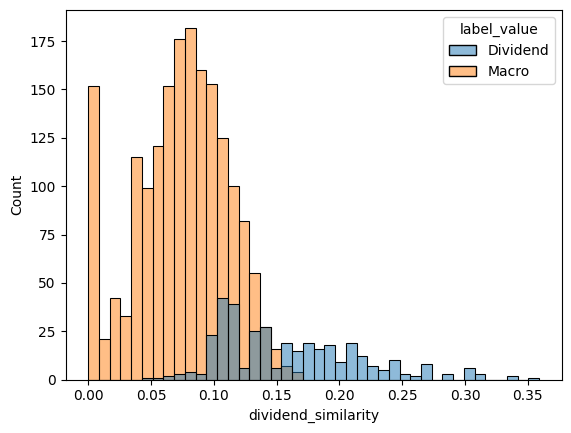

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


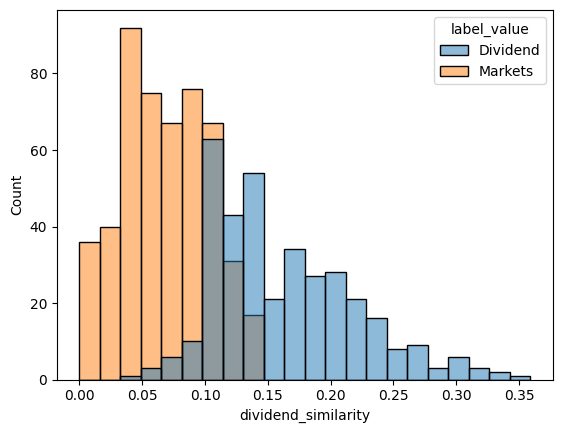

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


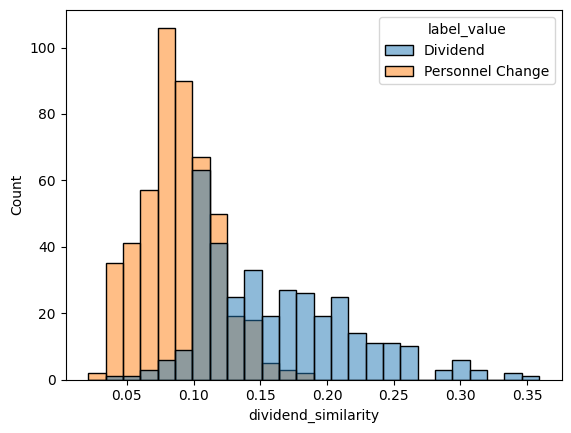

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


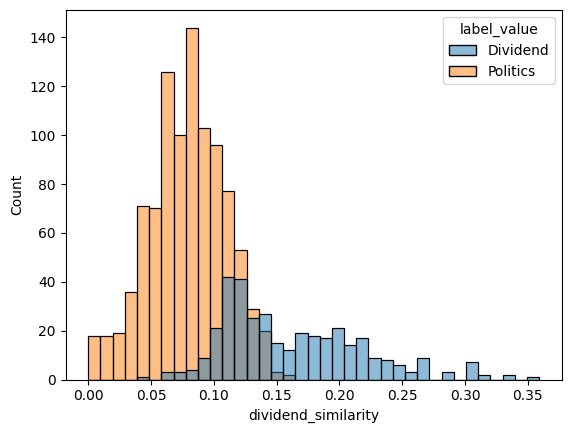

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


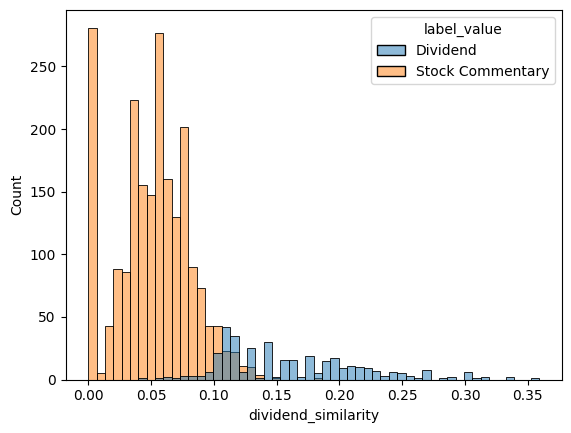

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


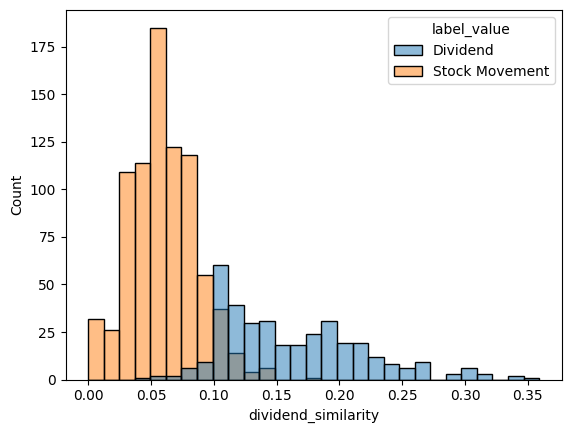

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


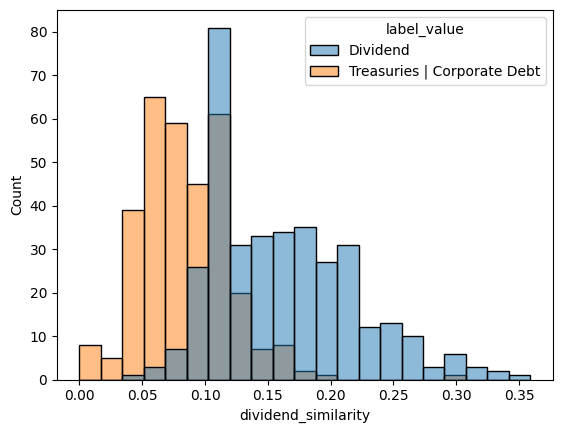

In [73]:

u = "Dividend"
for cur_label in [x for x in list(df['label_value'].unique()) if x != u]:
    sns.histplot(data=df.loc[((df['label_value']==u )|(df['label_value']==cur_label)),: ], x="dividend_similarity", hue="label_value")
    plt.show()